In [ ]:
# Implementing the neural networks from scratch

In [62]:
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


In [8]:
df=pd.read_csv('customer_churn_data.csv')

In [9]:
df.shape
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.duplicated().sum()

0

In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df=pd.get_dummies(df,columns=['Geography',"Gender"], drop_first=True)

In [50]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 9953 to 2745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   uint8  
 9   Geography_Spain    2000 non-null   uint8  
 10  Gender_Male        2000 non-null   uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 146.5 KB


In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [65]:
model=Sequential()

model.add(Dense(5,activation='relu', input_dim=11))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 60        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [82]:
history = model.fit(X_train_scaled,y_train,epochs=30,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
 576/6400 [=>............................] - ETA: 1s - loss: 0.4325 - accuracy: 0.8108

6400/6400 [==============================] - 1s 193us/sample - loss: 0.3719 - accuracy: 0.8473 - val_loss: 0.3765 - val_accuracy: 0.8413
Epoch 2/30
6400/6400 [==============================] - 1s 202us/sample - loss: 0.3694 - accuracy: 0.8473 - val_loss: 0.3739 - val_accuracy: 0.8400
Epoch 3/30
6400/6400 [==============================] - 1s 197us/sample - loss: 0.3672 - accuracy: 0.8497 - val_loss: 0.3713 - val_accuracy: 0.8425
Epoch 4/30
6400/6400 [==============================] - 1s 234us/sample - loss: 0.3652 - accuracy: 0.8491 - val_loss: 0.3690 - val_accuracy: 0.8413
Epoch 5/30
6400/6400 [==============================] - 1s 175us/sample - loss: 0.3631 - accuracy: 0.8511 - val_loss: 0.3673 - val_accuracy: 0.8444
Epoch 6/30
6400/6400 [==============================] - 1s 197us/sample - loss: 0.3613 - accuracy: 0.8539 - val_loss: 0.3649 - val_accuracy: 0.8450
Epoch 7/30
6400/6400 [==============================] - 1s 203us/sample - loss: 0.3593 - accuracy: 0.8542 - val_loss: 0.362

In [72]:
model.layers[1].get_weights()

[array([[-0.9066742 , -0.73724365,  0.5072259 ],
        [ 0.3035268 ,  0.9036738 , -0.43374854],
        [-1.1918006 , -1.3012422 ,  1.3059602 ],
        [ 0.48307878,  0.85902387, -1.1162188 ],
        [ 0.6822586 ,  1.3638945 , -0.3962931 ]], dtype=float32),
 array([ 0.25884724,  0.5713998 , -0.437252  ], dtype=float32)]

In [73]:
y_log=model.predict(X_test_scaled)

In [80]:
y_pred=np.where(y_log>=0.5,1,0)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.854

In [83]:
import matplotlib.pyplot as plt


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



In [85]:
history.history

{'loss': [0.3718600753694773,
  0.36944712497293947,
  0.36722479440271855,
  0.36520282879471777,
  0.36308921545743944,
  0.36131966311484576,
  0.3592965914309025,
  0.3576196148991585,
  0.35603700287640094,
  0.3546610067039728,
  0.35314296461641786,
  0.3518007964640856,
  0.35083367593586445,
  0.34999766282737255,
  0.34891702853143214,
  0.3479417863488197,
  0.3474202460795641,
  0.346542551741004,
  0.34588154464960097,
  0.3454506167396903,
  0.3447829318791628,
  0.3442697262018919,
  0.34392405189573766,
  0.34317819826304913,
  0.342972097992897,
  0.3425075881183147,
  0.34241720974445344,
  0.3418459426984191,
  0.34162075772881506,
  0.34112581726163627],
 'accuracy': [0.84734374,
  0.84734374,
  0.8496875,
  0.8490625,
  0.85109377,
  0.8539063,
  0.8542187,
  0.8564063,
  0.8578125,
  0.8575,
  0.858125,
  0.85828125,
  0.85890627,
  0.85875,
  0.8584375,
  0.859375,
  0.8603125,
  0.86125,
  0.85890627,
  0.86125,
  0.86109376,
  0.8625,
  0.861875,
  0.8615625,
 

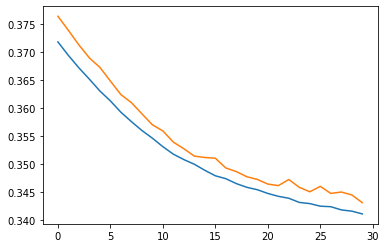

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

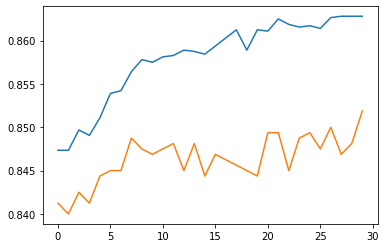

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])